# Classification of date fruit type based on their morphological features

## INTRODUCTION:

The date fruit (Phoenix dactylifera) boasts over 2500 species globally and can be categorized into approximately 200 types. Worldwide, the variety of date fruits are often used in food, medicine, and cosmetics. For our assignment, we utilized the dataset from a study titled "Classification of Date Fruits into Genetic Varieties Using Image Analysis," published by Koklu, M., Kursun, R., Taspinar, Y.S., and Cinar, I. in 2021.

The main features of this dataset include morphological features (i.e., Area, Perimeter, Major axis, Minor axis, etc.), shape features (i.e., Shapefactor_1, Shapefactor_2, etc.), and color features (i.e., Mean RR, Std. dev RR, Skey RR, etc.). The dataset contains seven date types from various regions: Barhee from the Palestinian region, Deglet Nour from Algeria, Sukkary, Ruthana, Safawi, and Sagai from Saudi Arabia, and Rotab Mozafati from Iran.

The predictive question for our project is: *Using the morphological feature variables, can the type of date fruit be predicted using classification modeling?*

This project employs the K-NN classification algorithm, known for its straightforwardness and effectiveness, to categorize date fruits based on the data we are working on. By analyzing morphological and color features from images, KNN helps in accurately identifying various date fruit varieties. This method is part of a broader effort to leverage simple yet powerful machine learning techniques within Agriculture 4.0, aiming to enhance predictive analytics and improve decision-making processes in farming operations (Hemamalini et al, 2022).

Other research has utilized advanced methods like local binary patterns (LBP) and Weber local descriptors (WLD) with support vector machines (SVM) for classifying date fruits, achieving over 98% accuracy by leveraging shape, size, and texture descriptors (Muhammad, 2015). However, our project employs the K-Nearest Neighbors algorithm as these methods are out of scope for our course.

## METHODS AND RESULTS:

In [1]:
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**READING THE DATASET :** 
- To read this dataset, we uploaded to the dataset to a google drive with open access so that we could directly read this dataset using the read_csv function. 

In [2]:
date_fruit_full_data <- read_csv("https://drive.google.com/uc?export=download&id=1jPdbQ6nzKO8h9KTi7R6VKyExp2o7Ry5P") |>
                        mutate(Class=as_factor(Class))

Rows: 898 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (34): AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY, EQDIASQ, SO...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**SELECTING NECESSARY COLUMNS :**
- Now, we use the select function to select the specific columns that we will be using for our overall data analysis.
- We have chosen "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", and "MINOR_AXIS" as they seem to be relevant features that are important for the prediction of the Class. 


In [3]:
date_fruit_data <- select(date_fruit_full_data, "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", "MINOR_AXIS")

**SPLITTING THE DATASET INTO TRAINING AND TESTING DATA :**
- This code below splits the data into training and testing sets using a 75%-25% split as mentioned in the "prop" argument. It stratifies the split by the "Class" column to ensure that each class is represented proportionally in both training and test sets.
- This is done to prepare the data for futher modeling, where the model is trained on one dataset and tested on another one to evaluate its perfomance. For now, we will be using the training data for further analysis and for plotting and making relevant tables. 

In [4]:
set.seed(1234)

date_fruit_split <- initial_split(date_fruit_data, prop = 0.75, strata = Class)
date_fruit_train <- training(date_fruit_split)
date_fruit_test <- testing(date_fruit_split)

date_fruit_train |> head()
date_fruit_test |> head()


Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,354590,2181.739,356244,772.2312,587.4540
BERHI,314313,2040.285,316111,728.9534,550.9473
BERHI,423905,2363.958,425214,836.8923,646.8287
BERHI,409607,2351.354,413253,835.5469,627.9048
BERHI,419554,2354.084,421223,832.2401,643.9600
BERHI,443805,2390.481,445009,797.2593,710.5616


Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,422163,2378.908,424428,837.8484,645.6693
BERHI,338136,2085.144,339014,723.8198,595.2073
BERHI,526843,2647.394,528876,940.7379,715.3638
BERHI,416063,2351.210,418255,827.9804,645.2988
BERHI,347562,2160.354,350797,763.9877,582.8359
BERHI,364495,2216.490,366374,790.9014,590.7698


**SUMMARIZING THE TRAINING DATA :**
- Now, we use group_by() and summarize() functions together to calculate mean values for several physical charateristics that we selected earlier.
- This helps us to understand the average physical properties of each fruit date class, which further would help us provide insights for exploratory data analysis.

In [5]:
date_fruit_mean <- date_fruit_train |> 
group_by(Class) |> 
summarize(
    count = n(),
    mean_area = mean(AREA),
    mean_perimeter = mean(PERIMETER),
    mean_convex_area = mean(CONVEX_AREA),
    mean_major = mean(MAJOR_AXIS),
    mean_minor = mean(MINOR_AXIS))

date_fruit_mean

Class,count,mean_area,mean_perimeter,mean_convex_area,mean_major,mean_minor
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,47,405482.9,2318.325,407774.7,813.3499,636.4218
DEGLET,74,235406.4,1839.708,239049.3,683.5410,441.3274
DOKOL,155,147337.3,1449.653,149353.2,544.3195,344.4504
IRAQI,53,429454.8,2401.085,432545.4,835.0885,657.9764
ROTANA,125,386408.7,2377.749,394402.3,830.9761,600.0658
SAFAVI,150,336491.8,2336.096,345713.2,881.2670,490.8415
SOGAY,68,289839.5,2067.422,298680.8,760.6261,495.1201


**VISUALIZATION DIFFERENT RELATIONSHIPS USING PLOTS :**
- We first chose the two columns perimeter and area and plotted them using geom_point() as shown below. This shows a relationship between Perimeter and Area, with different classes shown by different color.
- This shows that the k-nn classifier algorithm will work on this dataset for predicting the date fruit type. 

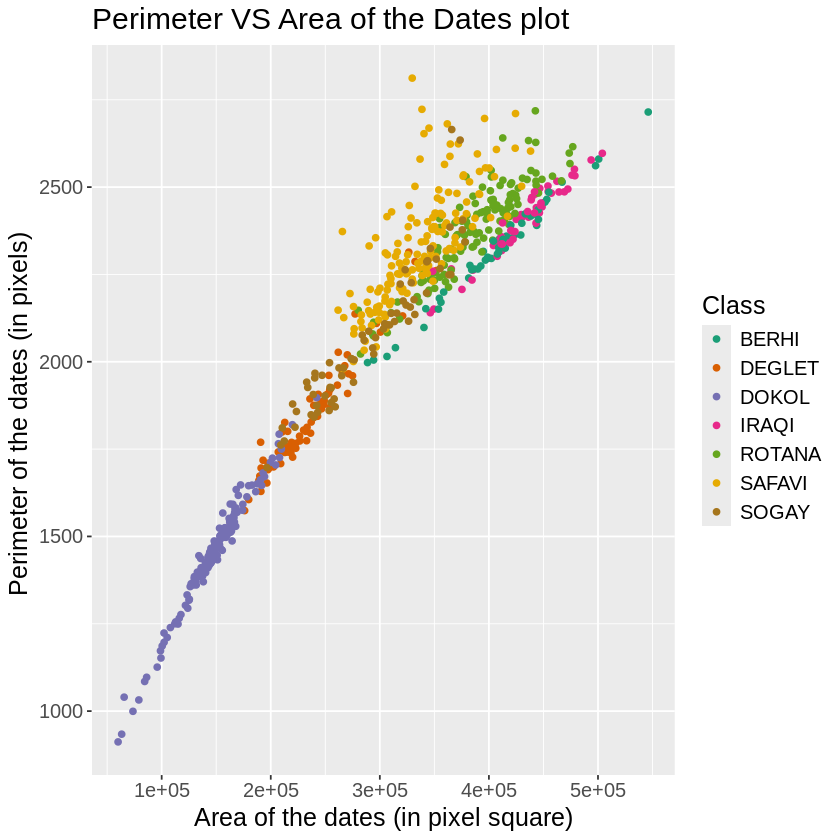

In [6]:
library(scales)

perimeter_vs_area <- ggplot(date_fruit_train, aes(x = AREA,
                     y = PERIMETER,
                     color = Class)) +
  geom_point() + 
  ggtitle("Perimeter VS Area of the Dates plot") +
  xlab("Area of the dates (in pixel square)") +
  ylab("Perimeter of the dates (in pixels) ") +
  theme(text = element_text(size = 15),
        legend.direction = "vertical") +
  scale_color_brewer(palette = "Dark2") 

perimeter_vs_area

The scatterplot above shows a strong positive correlation between the perimeter and the area of the dates. DOKOL has a distinct cluster but for all the other classes there appears to be overlaps with other classes. This may indicate that predictions for the DOKOL class will yield a greater accuracy.

- Now, we visualize a scatter plot between Major and Minor Axis which is also colored by class.

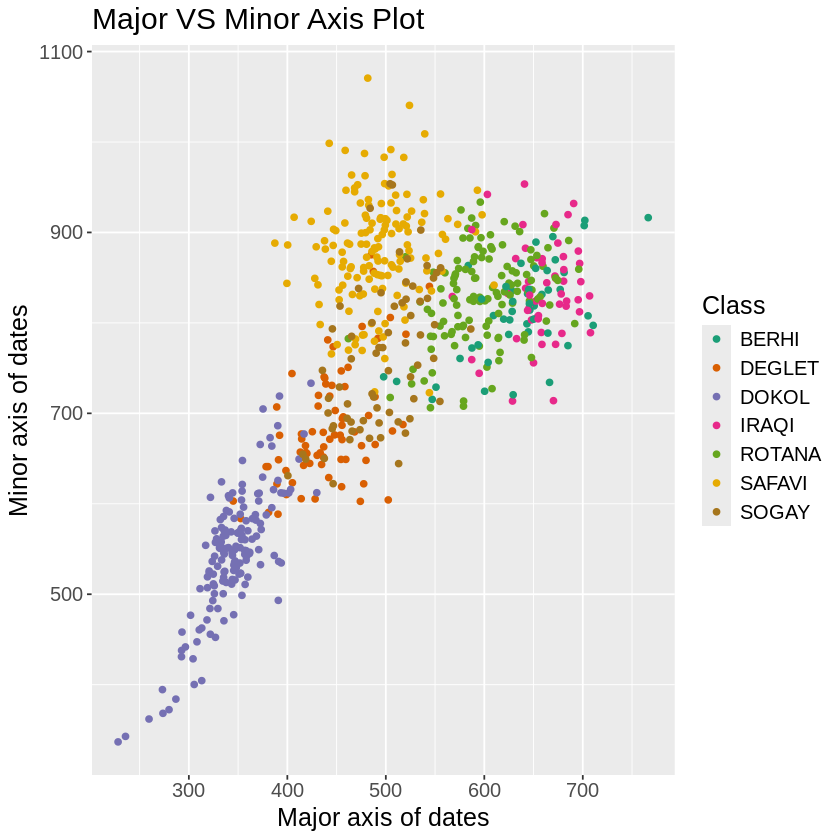

In [7]:
major_vs_minor <- ggplot(date_fruit_train, aes(x = MINOR_AXIS,y = MAJOR_AXIS,color = Class)) +
                  geom_point() +
                  xlab("Major axis of dates") +
                  ylab("Minor axis of dates") +
                  ggtitle("Major VS Minor Axis Plot")+
                  theme(text = element_text(size = 15),
                        legend.direction = "vertical") +
                  scale_color_brewer(palette = "Dark2")

major_vs_minor

The scatterplot above shows a low positive correlation between the major axis and the minor axis of dates. Similar to the previous scatterplot, DOKOL displays distinct clustering with another class of SAFAVI having a slight distinct cluster. The clustering pattern of this plot indicates that the prediction classes of DOKOL and SAVAFI may yield greater accuracy.

**5-Fold Cross-Validation and K-NN Model Specification**

The first step for choosing the most appropriate value for K is to perform a 5-fold cross-validation on the date fruit training dataset. The vfold_cv function is used to split the overall training data into v folds, and the strata is set to class to ensure that each fold contains a proportional representation of each class.

Next a recipe is created to reprocess the data, and after the predictors are standardized, a model specification for K-NN is made using tune() to help find the optimal value of K.


 

In [8]:
#Using cross-validation
set.seed(2345)

date_fruit_vfold <- vfold_cv(date_fruit_train, v = 5, strata = Class)

In [9]:
#Creating the recipe and K-nn model specification (using tune() for neighbors)
set.seed(3456)

date_fruit_recipe <- recipe(Class ~ ., data = date_fruit_split) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

date_fruit_recipe
knn_tune



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 5



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


**Workflow**

The recipe and model specification are joined together in a workflow, and the tune_grid function is used to fit the values of the model to the range of pre-defined parameters, which further helps optimize our model. Collect_metrics function is then used to assess the mean and variation in the accuracy of the classifier model across the sets of folds.

The column .metric is filtered for the evaluation metrics that pertains to accuracy. This will help us plot the Accuracy Estimate v.s. Neighbors plot in the subsequent step.

In [10]:
set.seed(4567)

knn_results <- workflow() |>
      add_recipe(date_fruit_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = date_fruit_vfold, grid = 15) |>
      collect_metrics()

accuracies <- knn_results |> 
      filter(.metric=="accuracy") 

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6366774,5,0.017772115,Preprocessor1_Model01
2,accuracy,multiclass,0.6366774,5,0.017772115,Preprocessor1_Model02
3,accuracy,multiclass,0.6962828,5,0.011078012,Preprocessor1_Model03
4,accuracy,multiclass,0.7007604,5,0.011000906,Preprocessor1_Model04
6,accuracy,multiclass,0.7216125,5,0.008597117,Preprocessor1_Model05
7,accuracy,multiclass,0.7246303,5,0.013030042,Preprocessor1_Model06
8,accuracy,multiclass,0.7172006,5,0.011607648,Preprocessor1_Model07
9,accuracy,multiclass,0.7112415,5,0.012665733,Preprocessor1_Model08
10,accuracy,multiclass,0.7172232,5,0.008413145,Preprocessor1_Model09


**Accuracy v.s. K Plot**

By plotting a line graph with the accuracy estimate on the y-axis and the K values on the x-axis, it allows us to choose the optimal number of neighbors through visual inspection. When K=12, it is the point with the greatest cross-validation accuracy estimate, so therefore, we will select this value for our predictions.

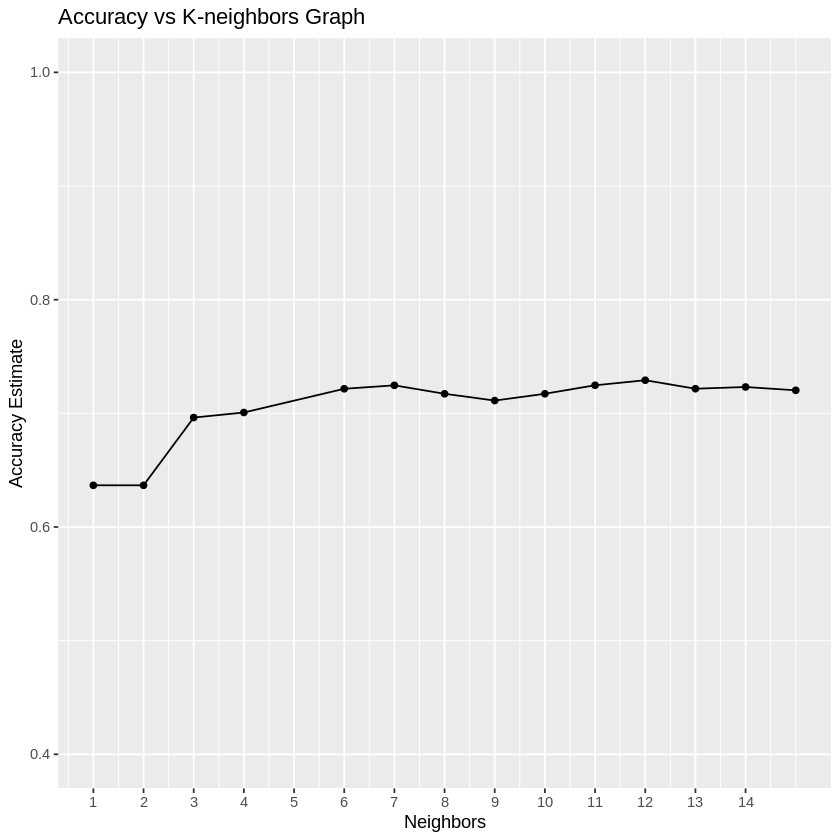

In [11]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      ggtitle("Accuracy vs K-neighbors Graph") +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
      scale_y_continuous(limits = c(0.4, 1.0))


accuracy_versus_k

Now, let's find the best value for K using the desc() and head() functions for confirmation.

In [16]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(mean, neighbors)
best_k

12 
0.7291305

So, we get that the highest accuracy is obtained when K is 12.

**K-NN Model and Workflow for K=12**

Now we remake the K-NN model and workflow, but instead of setting neighbors to tune(), the chosen value of 12 is inserted. The fit() function is also used in the workflow, and this allows the K-NN classifier to be retrained on the training dataset before this model is used to evaluate the test dataset.


In [12]:
set.seed(2020)
# Making the Model and the workflow again for K = 12
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
      set_engine("kknn") |>
      set_mode("classification")

date_fruit_fit_final <- workflow() |>
      add_recipe(date_fruit_recipe) |>
      add_model(knn_spec_final) |>
      fit(data = date_fruit_train)

date_fruit_fit_final

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2782738
Best kernel: rectangular
Best k: 12

**Predictions**

The predict() function is used to make predictions about the class for the test dataset, and the bind_cols function joins the predicted class to the original class of the test data into a single dataframe.

In [13]:
#predicting

set.seed(2020) 

date_fruit_test_predictions <- predict(date_fruit_fit_final , date_fruit_test) |>
        bind_cols(date_fruit_test)


date_fruit_test_predictions

.pred_class,Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,BERHI,422163,2378.908,424428,837.8484,645.6693
BERHI,BERHI,338136,2085.144,339014,723.8198,595.2073
IRAQI,BERHI,526843,2647.394,528876,940.7379,715.3638
BERHI,BERHI,416063,2351.210,418255,827.9804,645.2988
ROTANA,BERHI,347562,2160.354,350797,763.9877,582.8359
ROTANA,BERHI,364495,2216.490,366374,790.9014,590.7698
ROTANA,BERHI,397744,2337.225,399862,869.5142,583.9490
IRAQI,BERHI,408220,2317.669,411229,769.1027,681.1285
ROTANA,BERHI,342514,2154.021,345541,764.3176,573.2928


**Evaluating the Model**

The final step is to evaluate the performance of our classifier by examining the accuracy and the confusion matrix. Using the group_by and the metrics functions allows us to calculate the proportion of the correct predictions made out of all of the predictions made for each class, which is shown in the .estimate column. Then, the conf_mat function is used to create the confusion matrix which gives a more detailed insight of the performance by showing how many labels were predicted correctly and incorrectly for the test data.


In [14]:
#Checking the accuracy for specific types of class
set.seed(2020) 

date_fruit_prediction_accuracy <- date_fruit_test_predictions |>
        group_by(Class) |>
        metrics(truth = Class, estimate = .pred_class) |>
        filter(.metric=="accuracy")

date_fruit_prediction_accuracy

Class,.metric,.estimator,.estimate
<fct>,<chr>,<chr>,<dbl>
BERHI,accuracy,multiclass,0.2222222
DEGLET,accuracy,multiclass,0.5000000
DOKOL,accuracy,multiclass,1.0000000
IRAQI,accuracy,multiclass,0.7368421
ROTANA,accuracy,multiclass,0.7560976
SAFAVI,accuracy,multiclass,0.8571429
SOGAY,accuracy,multiclass,0.3846154


In [15]:
# Making the confusion matrix 
set.seed(2020) 

date_fruit_mat <- date_fruit_test_predictions |> 
      conf_mat(truth = Class, estimate = .pred_class)

date_fruit_mat

          Truth
Prediction BERHI DEGLET DOKOL IRAQI ROTANA SAFAVI SOGAY
    BERHI      4      0     0     2      1      0     0
    DEGLET     0     12     0     0      0      1    11
    DOKOL      0      5    49     0      0      1     0
    IRAQI      6      0     0    14      5      0     0
    ROTANA     8      1     0     3     31      3     1
    SAFAVI     0      3     0     0      0     42     4
    SOGAY      0      3     0     0      4      2    10

## Discussion

### Summarizing the Results Obtained:

- To create a classification model, we aimed to predict the class of date fruits using selected morphological variables. The process involved several steps: initial data preparation, analysis and visualization, setting up a KNN model for classification, training and tuning the model, using cross-validation to find the 'k' value with the highest accuracy, and finally, using the optimally trained model to predict the classes of the test dataset. Additionally, we evaluated our model's performance by calculating the estimated accuracy with the ‘metric’ function and creating a confusion matrix.
- After this series of operations, we successfully developed a classification model that predicts the classes of date fruits. With the optimal ‘k’ chosen, our model minimized the overall misclassification rate to 0.2782738, which implies an overall accuracy of 72.17% (0.7217262). Furthermore, we assessed the accuracy by class using grouped metrics, discovering that the estimated accuracy varied across different classes. The confusion matrix also highlighted potential issues, such as certain types of dates being consistently misclassified as others, possibly indicating similar physical characteristics or insufficiently distinct features in the data used for those classes. For example, in our test data, the date fruit 'Deglet' was predicted 24 times: 12 predictions were accurate, 11 were misclassified as 'Sogay', and one as 'Safavi'.

### Evaluating Outcomes: Did It Meet Our Expectations?

- According to our goal of creating a model that “classifies different types of date fruit into their correct types based on selected morphological features as predictors,” the results from our predictive model generally met our expectations. Focusing on the overall model accuracy, our model demonstrates relatively good capability and robustness in predictions, achieving an accuracy rate of 72.17% (0.7217262), which is significantly higher than random chance.
- However, the accuracy metrics and confusion matrix reveal significant misclassifications for certain classes. For example, the estimated accuracies for ‘Berhi’ and ‘Sogay’ are 22% (0.2222222) and 38% (0.3846154), respectively. With estimated accuracy rates lower than random chance for certain classes, it is evident that a model performing well on average might still be ineffective for certain categories if it disproportionately misclassifies them.
- Therefore, to fully meet the classification goal and our expectations with high accuracy across all classes, further refinement in feature selection, data sampling, or exploring different or more complex models could be beneficial. This would ensure that the performance is not only high on average but also uniformly high across all fruit types, thereby making the model more reliable and useful in practical scenarios.

### Assessing the Impact: What Are the Consequences of These Findings?

- Our predictive model for classifying date fruits could have significant future impacts on the agricultural sector. If our model is further refined and improved in terms of both overall and specific class accuracy rates, it could greatly streamline the sorting process during harvest. By rapidly and accurately categorizing dates based on their morphological characteristics, the model ensures that fruits are appropriately grouped for subsequent distribution. Moreover, further development of the model could enhance quality control measures by quickly identifying any fruits that deviate from expected size, shape, or texture norms, which may indicate disease or pests. Such early detection is vital for maintaining efficient production and minimizing waste.

### What Questions Do These Findings Raise for Future Research?

Our predictive model could raise several future questions related to improving the model, generalizing its application, and integrating it with existing technologies.

- What kind of refinements can be made to further improve the accuracy of our model, or even achieve a 100% accuracy rate?
- Can the predictive model for date fruits be generalized to other types of fruits and crops?
- How can this model be integrated into existing agricultural technology infrastructures, such as automated sorting machines?
  



## References:

*Literature Citations:*

Hemamalini, V., Rajarajeswari, S., Nachiyappan, S., Sambath, M., Devi, T., Singh, B. K., & Raghuvanshi, A. (2022). Food quality inspection and grading using efficient image segmentation and machine learning-based system. Journal of Food Quality, 2022, 1-6. https://doi.org/10.1155/2022/5262294

Muhammad, G. (2015). Date fruits classification using texture descriptors and shape-size features. Engineering Applications of Artificial Intelligence, 37, 361-367. https://doi.org/10.1016/j.engappai.2014.10.001

*Data Source:*

Koklu, M., Kursun, R., Taspinar, Y. S., & Cinar, I. (2021). Classification of date fruits into genetic varieties using image analysis. Mathematical Problems in Engineering, 2021, 1-13. https://doi.org/10.1155/2021/4793293
